# Project: Consumer Personal Loan

### Table of Content

1.Introduction


2.Data wrangling process
     
     a.Data gathering
     
     b.Data Assessing
          
          i.Quality Issues
          
          ii.Tidiness Issues
     
     c.Data Cleaning
           i.Define
           
           ii.Code
           
           iii.Test
    
    
3. Model Selection
  
  
4. Conclusion

## 1. Introduction

Problem Statement: Prediction of Approval of Consumer Personal Loans Applications using different Machine Learning Algorithms.

Machine Learning Algorithms Used:

1.Logistic Regression

2.Random Forest Classifier

3.Support Vector Machine Classifier

4.Gradient Boosting Classfier

5.XGboost Classifier


In this project we will be predicting whether a person is given personal loan or not on the basis of historical data.

The real data is provided by Edulyt India under Internship program.
We will follow the basic Machine Learning pipelines.
As it is a classification problem so we will be applying various classification Machine Learning Algorithms mentioned above.
We will choose the best model on the basis of accuracy score.

## 2. Data Wrangling Process

###  Data Gathering

Data is provided by Edulyt India

In [1]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb


In [2]:
#load data
df=pd.read_excel("Train Data.xlsx")

### Data Assessing

##### Visual Assessment

In [3]:
#top five rows
df.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [4]:
#last five elements
df.tail()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
609,CPL002978,F,N,Farlay,Stoakes,fstoakeso6@multiply.com,7 Dixon Point,0,Grad,N,3480.0,0.0,71.0,360.0,1.0,Rural,7970371132,71-281-1408,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.8...,Y
610,CPL002979,M,Y,Nestor,Saben,nsabeno8@google.es,7590 Almo Crossing,3+,Grad,N,4927.2,0.0,40.0,180.0,1.0,Rural,5389023404,94-349-9755,Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) G...,Y
611,CPL002983,M,Y,Stanleigh,Le Fevre,slefevreo9@biblegateway.com,532 Hoepker Street,1,Grad,N,9686.4,288.0,253.0,360.0,1.0,Urban,5977024495,70-685-8094,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Y
612,CPL002984,M,Y,Amalle,Whitmell,awhitmelloa@ftc.gov,6417 Gerald Alley,2,Grad,N,9099.6,0.0,187.0,360.0,1.0,Urban,3077859882,09-770-7899,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Y
613,CPL002990,F,N,Gilly,Gauchier,ggauchierob@artisteer.com,37 Ruskin Crossing,0,Grad,Y,5499.6,0.0,133.0,360.0,0.0,Semi U,5248569311,58-618-0693,Mozilla/5.0 (Windows; U; Windows NT 5.1; ru-RU...,N


##### Programmatic Assessment

In [5]:
#general idea about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             601 non-null    object 
 2   Marital_Status  611 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      599 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              582 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      612 non-null    float64
 13  CPL_Term        600 non-null    float64
 14  Credit_His      564 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

###### Check For Missing Values

In [6]:
df.isna().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

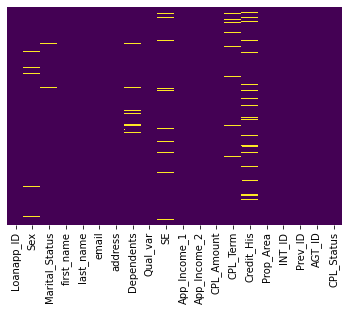

In [7]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

###### Quality Issues:

1. Missing Values in Sex,Marital_Status,Credit_His,SE,Dependents,CPL_Amount,CPL_Term

2. Remove Unused Columns in Cleaning Process

##### Tidiness Issues:

1. Income columns should be combined as single column only.

### Data Cleaning

In [8]:
#copy before cleaning the original dataset
df_copy=df.copy()

#### Define :

1. Missing values in Sex,Marital_Status,Credit_His,SE,Dependents,CPL_Amount,CPL_Term

##### Code:

In [9]:
# Handle Missing Values of Credit_His
def Credit(cols):
    Credit_His=cols[0]
    Prop_Area=cols[1]
    CPL_Status=cols[2]
    if pd.isna(Credit_His):
        if Prop_Area=='Semi U' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Semi U' and CPL_Status=='Y':
            return 1
        elif Prop_Area=='Rural' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Rural' and CPL_Status=='Y':
            return 1
        elif Prop_Area=='Urban' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Urban' and CPL_Status=='Y':
            return 1
        
    else:
        return Credit_His
    
df_copy['Credit_His']=df_copy[['Credit_His','Prop_Area','CPL_Status']].apply(Credit,axis=1)

In [10]:
df_copy.groupby(['SE','Prop_Area']).count()

Loanapp_ID  Sex  Marital_Status  first_name  last_name  email  \
SE Prop_Area                                                                  
N  Rural             143  140             143         143        143    143   
   Semi U            191  187             189         191        191    191   
   Urban             166  164             165         166        166    166   
Y  Rural              26   25              26          26         26     26   
   Semi U             32   30              32          32         32     32   
   Urban              24   23              24          24         24     24   

              address  Dependents  Qual_var  App_Income_1  App_Income_2  \
SE Prop_Area                                                              
N  Rural          143         141       143           143           143   
   Semi U         191         186       191           191           191   
   Urban          166         160       166           166           166   
Y  Rural           26          26        26            26            26   
   Semi U          32          31        32            32            32   
   Urban           24          23        24            24            24   

              CPL_Amount  CPL_Term  Credit_His  INT_ID  Prev_ID  AGT_ID  \
SE Prop_Area                                                              
N  Rural             143       139         143     143      143     143   
   Semi U            191       189         191     191      191     191   
   Urban             164       161         166     166      166     166   
Y  Rural              26        26          26      26       26      26   
   Semi U             32        31          32      32       32      32   
   Urban              24        23          24      24       24      24   

              CPL_Status  
SE Prop_Area              
N  Rural             143  
   Semi U            191  
   Urban             166  
Y  Rural              26  
   Semi U             32  
   Urban              24

In [11]:
#Handle Missing Values of SE(Self_Employed)
def Self_Employeed(cols):
    SE=cols[0]
    Prop_Area=cols[1]
    if pd.isna(SE):
        if Prop_Area=='Semi U':
            return 'Y'
        elif Prop_Area=='Rural':
            return 'Y'
        elif Prop_Area=='Urban':
            return 'N'
        
    else:
        return SE
    
df_copy['SE']=df_copy[['SE','Prop_Area']].apply(Self_Employeed,axis=1)

In [12]:
#Handle Missing Values of CPL_Term
df_copy['CPL_Term'].fillna(method='ffill',inplace=True)

In [13]:
#Handle Missing Values of CPL_Amount
df_copy['CPL_Amount'].fillna(method='bfill',inplace=True)

In [14]:
#Handle Missing Values of SEX
df_copy['Sex'].fillna(method='ffill',inplace=True)

In [15]:
#Handle Missing Values of Marital_Status
df_copy['Marital_Status'].fillna(method='ffill',inplace=True)

In [16]:
df_copy.groupby(['Sex','Dependents']).count()['Marital_Status']

Sex  Dependents
F    0              81
     1              19
     2               7
     3+              4
M    0             264
     1              83
     2              94
     3+             47
Name: Marital_Status, dtype: int64

In [17]:
#Handle Missing Values of Dependents
def dependent(cols):
    Dependents=cols[0]
    Marital_Status=cols[1]
    Sex=cols[2]
    if pd.isna(Dependents):
        if Sex =='M' and Marital_Status =='N':
            return 0
        elif Sex =='M' and Marital_Status =='Y':
            return 2
        elif Sex =='F' and Marital_Status =='N':
            return 0
        elif Sex =='F' and Marital_Status =='Y':
            return 1
        
    else:
        return Dependents
    
df_copy['Dependents']=df_copy[['Dependents','Marital_Status','Sex']].apply(dependent,axis=1)

##### Test:

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             614 non-null    object 
 2   Marital_Status  614 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      614 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              614 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      614 non-null    float64
 13  CPL_Term        614 non-null    float64
 14  Credit_His      614 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

##### Define:

1. Income columns should be combined as single column only.

##### Code:

In [19]:
df_copy['Total_Income']=df_copy['App_Income_1']+df_copy['App_Income_2']

##### Test:

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             614 non-null    object 
 2   Marital_Status  614 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      614 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              614 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      614 non-null    float64
 13  CPL_Term        614 non-null    float64
 14  Credit_His      614 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

##### Define:

Remove Unused Columns in Cleaning Process

##### Code:

In [21]:
df_copy=df_copy.drop(columns=['Loanapp_ID','first_name','last_name','email','address','App_Income_1','App_Income_2','INT_ID','Prev_ID','AGT_ID'])

##### Test:

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             614 non-null    object 
 1   Marital_Status  614 non-null    object 
 2   Dependents      614 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              614 non-null    object 
 5   CPL_Amount      614 non-null    float64
 6   CPL_Term        614 non-null    float64
 7   Credit_His      614 non-null    float64
 8   Prop_Area       614 non-null    object 
 9   CPL_Status      614 non-null    object 
 10  Total_Income    614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


## 3. Model Selection

#### Converting Categorical Variables To Dummy Variables

In [23]:
#sex column having mle and female
sex=pd.get_dummies(df_copy.Sex,prefix='sex')

In [24]:
#marital status is in the type of Yes or No
marital_status=pd.get_dummies(df_copy.Marital_Status,prefix='marital')

In [25]:
#Dependents is in the type of 0,1,2, or 3+
depend=pd.get_dummies(df_copy.Dependents,prefix='depend')

In [26]:
#grad or non grad type
qualification=pd.get_dummies(df_copy.Qual_var)

In [27]:
#self employed yes or no
se=pd.get_dummies(df_copy.SE,prefix='self_emp')

In [28]:
#area of applicants Urban, Semi urban and Rural
area=pd.get_dummies(df_copy.Prop_Area)

In [29]:
#contatinate dummy variables to train dataset
train=pd.concat([df_copy,sex,marital_status,qualification,se,area,depend],axis='columns')


In [30]:
#check the dummies are created or not
train.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,...,Non Grad,self_emp_N,self_emp_Y,Rural,Semi U,Urban,depend_0,depend_1,depend_2,depend_3+
0,M,N,0,Grad,N,153.6,360.0,1.0,Urban,Y,...,0,1,0,0,0,1,1,0,0,0
1,M,Y,1,Grad,N,153.6,360.0,1.0,Rural,N,...,0,1,0,1,0,0,0,1,0,0
2,M,Y,0,Grad,Y,79.2,360.0,1.0,Urban,Y,...,0,0,1,0,0,1,1,0,0,0
3,M,Y,0,Non Grad,N,144.0,360.0,1.0,Urban,Y,...,1,1,0,0,0,1,1,0,0,0
4,M,N,0,Grad,N,169.2,360.0,1.0,Urban,Y,...,0,1,0,0,0,1,1,0,0,0


In [31]:
#drop features those are converted to dummy variables
train=train.drop(columns=['Sex','Marital_Status','Qual_var','SE','Prop_Area','Dependents'])

In [32]:
#summarized before modeling
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPL_Amount    614 non-null    float64
 1   CPL_Term      614 non-null    float64
 2   Credit_His    614 non-null    float64
 3   CPL_Status    614 non-null    object 
 4   Total_Income  614 non-null    float64
 5   sex_F         614 non-null    uint8  
 6   sex_M         614 non-null    uint8  
 7   marital_N     614 non-null    uint8  
 8   marital_Y     614 non-null    uint8  
 9   Grad          614 non-null    uint8  
 10  Non Grad      614 non-null    uint8  
 11  self_emp_N    614 non-null    uint8  
 12  self_emp_Y    614 non-null    uint8  
 13  Rural         614 non-null    uint8  
 14  Semi U        614 non-null    uint8  
 15  Urban         614 non-null    uint8  
 16  depend_0      614 non-null    uint8  
 17  depend_1      614 non-null    uint8  
 18  depend_2      614 non-null    

#### Train Test Split of Dataset

In [33]:
#import lib to train and test the data
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('CPL_Status',axis=1),train['CPL_Status'],test_size=0.30,random_state=0)

### Logistic Regression

In [35]:
logmodel=LogisticRegression()

In [36]:
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
y_pred=logmodel.predict(x_test)

In [38]:
#confusion matrx between y_actual and y_predicted
matrix=confusion_matrix(y_test,y_pred)

In [39]:
matrix

array([[ 24,  27],
       [  2, 132]], dtype=int64)

In [40]:
score=accuracy_score(y_test,y_pred)

In [41]:
#accuracy score
score

0.8432432432432433

#### Cross Validation 

In [42]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=6)
accuracy_cross = np.mean(scores)
print(scores)
print(accuracy_cross)

[0.84466019 0.80582524 0.80392157 0.81372549 0.8627451  0.85294118]
0.8306364617044228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### Random Forest Classifier

In [43]:
rf_model=RandomForestClassifier()

In [44]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=rf_model.predict(x_test)

In [46]:
matrix=confusion_matrix(y_test,y_pred)

In [47]:
matrix

array([[ 25,  26],
       [ 11, 123]], dtype=int64)

In [48]:
score=accuracy_score(y_test,y_pred)

In [49]:
score

0.8

#### Cross Validation for Random Forest

In [50]:
rf=RandomForestClassifier(n_estimators=35)
scores_rf = cross_val_score(rf,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=5)
accuracy_cross_rf = np.mean(scores_rf)
print(scores_rf)
print(accuracy_cross_rf)

[0.80487805 0.73170732 0.73170732 0.81300813 0.78688525]
0.7736372117819539


### SVM:Support Vector Machine

In [51]:
svm_model=SVC()

In [52]:
svm_model.fit(x_train,y_train)

SVC()

In [53]:
y_pred=svm_model.predict(x_test)

In [54]:
matrix=confusion_matrix(y_test,y_pred)

In [55]:
matrix

array([[  0,  51],
       [  0, 134]], dtype=int64)

In [56]:
score=accuracy_score(y_test,y_pred)

In [57]:
score

0.7243243243243244

#### Cross Validation for SVM

In [58]:
svm=SVC()
scores_svm = cross_val_score(svm,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=6)
accuracy_cross_svm = np.mean(scores_svm)
print(scores_svm)
print(accuracy_cross_svm)

[0.68932039 0.67961165 0.68627451 0.68627451 0.66666667 0.68627451]
0.6824037058188971


### Gradient Boosting Classifier

In [59]:
gbc_model=GradientBoostingClassifier()

In [60]:
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [61]:
y_pred=gbc_model.predict(x_test)

In [62]:
matrix=confusion_matrix(y_test,y_pred)

In [63]:
matrix

array([[ 25,  26],
       [  7, 127]], dtype=int64)

In [64]:
score=accuracy_score(y_test,y_pred)

In [65]:
score

0.8216216216216217

##### Cross Validation for GBC

In [66]:
from sklearn.model_selection import cross_val_score
gbc = GradientBoostingClassifier(random_state=10,n_estimators=100)
scores_gbc = cross_val_score(gbc,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=8)
accuracy_cross_gbc = np.mean(scores_gbc)
print(scores_gbc)
print(accuracy_cross_gbc)

[0.83116883 0.79220779 0.79220779 0.84415584 0.81818182 0.81818182
 0.78947368 0.89473684]
0.8225393028024608


### XGBoost Classifier

In [67]:
model = XGBClassifier()
model.fit(x_train,y_train)
# make predictions for test data
y_pred = model.predict(x_test)

In [68]:
matrix=confusion_matrix(y_test,y_pred)

In [69]:
matrix

array([[ 26,  25],
       [ 20, 114]], dtype=int64)

In [70]:

score=accuracy_score(y_test,y_pred)

In [71]:
score

0.7567567567567568

## 4.Conclusion

Well, we applied five machine learning algorithms and out of those five only Logistic Regrerssion and Gradient Boosting Classfier are giving accuracy score above 80 percent.
Support Vector Machine is worst among them with 72 percent of accuracy score and 68 perceent of validation score.
Random forest Gives 80 percent but during cross validation score it goes less than 80 percent.

We may choose either Logistic Regression or Gradient Boosting Classifier for Hyper Parameter Tunning.